Files found: ['img_001_SRF_2_HR.png', 'img_001_SRF_2_LR.png', 'img_002_SRF_2_HR.png', 'img_002_SRF_2_LR.png', 'img_003_SRF_2_HR.png', 'img_003_SRF_2_LR.png', 'img_004_SRF_2_HR.png', 'img_004_SRF_2_LR.png', 'img_005_SRF_2_HR.png', 'img_005_SRF_2_LR.png']
Image pairs identified: [('img_001_SRF_2_HR.png', 'img_001_SRF_2_LR.png'), ('img_002_SRF_2_HR.png', 'img_002_SRF_2_LR.png'), ('img_003_SRF_2_HR.png', 'img_003_SRF_2_LR.png'), ('img_004_SRF_2_HR.png', 'img_004_SRF_2_LR.png'), ('img_005_SRF_2_HR.png', 'img_005_SRF_2_LR.png')]
Found 5 image pairs.


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Batch 1
High-resolution batch shape: torch.Size([4, 3, 224, 224])
Low-resolution batch shape: torch.Size([4, 3, 224, 224])


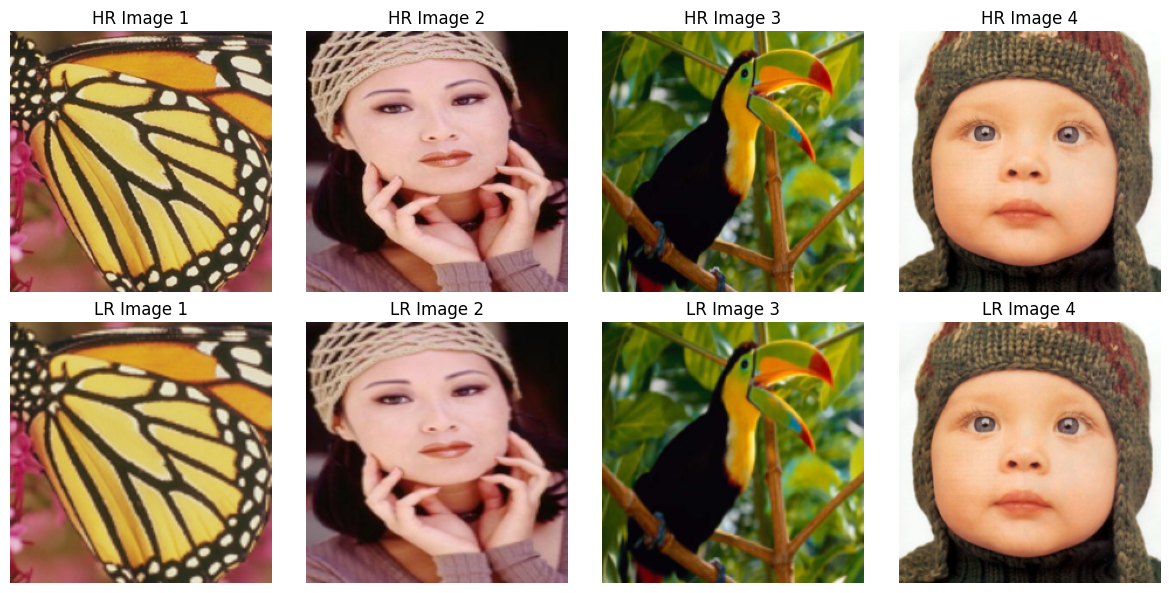

In [3]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

class CustomImagePairDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_pairs = self._get_image_pairs()

        print(f"Found {len(self.image_pairs)} image pairs.")

    def _get_image_pairs(self):
        image_pairs = []
        files = sorted(os.listdir(self.root_dir))

        print(f"Files found: {files}")

        image_dict = {}
         # Extract base name
        for file in files:
            if file.endswith('_HR.png'):
                base_name = file.rsplit('_HR.png', 1)[0]
                image_dict[base_name] = {'HR': file}
            elif file.endswith('_LR.png'):
                base_name = file.rsplit('_LR.png', 1)[0]
                if base_name in image_dict:
                    image_dict[base_name]['LR'] = file

        # Extract pairs from the dictionary
        for base_name, images in image_dict.items():
            if 'LR' in images:
                hr_image = images['HR']
                lr_image = images['LR']
                image_pairs.append((hr_image, lr_image))

        print(f"Image pairs identified: {image_pairs}")

        return image_pairs

    def __len__(self):
        return len(self.image_pairs)

    def __getitem__(self, idx):
        hr_image_name, lr_image_name = self.image_pairs[idx]

        try:
            hr_image = Image.open(os.path.join(self.root_dir, hr_image_name)).convert('RGB')
            lr_image = Image.open(os.path.join(self.root_dir, lr_image_name)).convert('RGB')
        except Exception as e:
            print(f"Error loading images: {e}")
            raise e

        if self.transform:
            hr_image = self.transform(hr_image)
            lr_image = self.transform(lr_image)

        return hr_image, lr_image

def imshow(tensor, title=None):
    # Convert tensor to numpy array # Convert from (C, H, W) to (H, W, C)
    image = tensor.cpu().numpy().transpose((1, 2, 0))
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

root_dir = '/content/drive/MyDrive/dataset/Set5/image_SRF_2'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = CustomImagePairDataset(root_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)


for i, (hr_batch, lr_batch) in enumerate(dataloader):
    print(f"Batch {i+1}")
    print(f"High-resolution batch shape: {hr_batch.shape}")
    print(f"Low-resolution batch shape: {lr_batch.shape}")

    # Display the first image pair from the batch
    if i == 0:
        fig, axs = plt.subplots(2, 4, figsize=(12, 6))
        for j in range(4):
            # Show high-resolution images
            axs[0, j].imshow(hr_batch[j].permute(1, 2, 0).cpu().numpy())
            axs[0, j].set_title(f"HR Image {j+1}")
            axs[0, j].axis('off')

            # Show low-resolution images
            axs[1, j].imshow(lr_batch[j].permute(1, 2, 0).cpu().numpy())
            axs[1, j].set_title(f"LR Image {j+1}")
            axs[1, j].axis('off')

        plt.tight_layout()
        plt.show()
    break

